# Reproduce Figure 5 and S5

This notebook contains code to reproduce analyses in Figure 5 and S5 from Yang\*, Jones\* et al, _bioRxiv_ 2021.

In [13]:
import os
import sys

from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
from scipy import stats
from scipy.spatial import distance
from scipy.cluster import hierarchy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from tqdm.auto import tqdm



sys.path.append("/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/KPTracer-release-main/cassiopeia-kp/") # specify path to jungle
import cassiopeia
from cassiopeia.Analysis import small_parsimony

sys.path.append("/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/plot/Figure5_S5/scripts/")
import tree_utilities

## Evolutionary Coupling

In [14]:
data_directory = "/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/"

adata = sc.read_h5ad(f'{data_directory}/expression/scRNA4_3000_25.h5ad')

In [15]:
adata

AnnData object with n_obs × n_vars = 47142 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'type', 'sample', 'cellBC', 'Tumor', 'A', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_sub'
    var: 'features', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'leiden_sub_colors', 'log1p', 'neighbors', 'pca', 'sample_colors', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [16]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,type,sample,cellBC,Tumor,A,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_sub
CTR_MGH.AAACCCAAGAACAGGA,SeuratProject,20293.0,5860,MGH,CTR_MGH,NA,NA,CTR_MGH.AAACCCAAGAACAGGA,5860,5860,20293.0,1872.0,9.224856,9,9
CTR_MGH.AAACCCACAACAAGAT,SeuratProject,41329.0,7035,MGH,CTR_MGH,CTR_MGH.AAACCCACAACAAGAT,CTR_MGH_1,CTR_MGH.AAACCCACAACAAGAT,7035,7035,41329.0,10.0,0.024196,14,13
CTR_MGH.AAACCCACAAGTTCCA,SeuratProject,58511.0,8377,MGH,CTR_MGH,CTR_MGH.AAACCCACAAGTTCCA,CTR_MGH_3,CTR_MGH.AAACCCACAAGTTCCA,8377,8377,58511.0,2219.0,3.792449,2,3
CTR_MGH.AAACCCACAATTCACG,SeuratProject,18558.0,4887,MGH,CTR_MGH,CTR_MGH.AAACCCACAATTCACG,CTR_MGH_4,CTR_MGH.AAACCCACAATTCACG,4887,4887,18558.0,1948.0,10.496821,2,3
CTR_MGH.AAACCCACAATTTCCT,SeuratProject,37945.0,6824,MGH,CTR_MGH,CTR_MGH.AAACCCACAATTTCCT,CTR_MGH_3,CTR_MGH.AAACCCACAATTTCCT,6824,6824,37945.0,833.0,2.195283,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GEM_RT.TTTGTTGGTTCTTGTT,SeuratProject,18774.0,4412,RT,GEM_RT,NA,NA,GEM_RT.TTTGTTGGTTCTTGTT,4412,4412,18774.0,760.0,4.048152,4,0
GEM_RT.TTTGTTGTCACGACTA,SeuratProject,33948.0,7574,RT,GEM_RT,GEM_RT.TTTGTTGTCACGACTA,GEM_RT_3,GEM_RT.TTTGTTGTCACGACTA,7574,7574,33948.0,524.0,1.543537,0,0
GEM_RT.TTTGTTGTCACGGGCT,SeuratProject,50676.0,7895,RT,GEM_RT,NA,NA,GEM_RT.TTTGTTGTCACGGGCT,7895,7895,50676.0,1044.0,2.060147,0,0
GEM_RT.TTTGTTGTCTCTGAGA,SeuratProject,60516.0,8118,RT,GEM_RT,GEM_RT.TTTGTTGTCTCTGAGA,GEM_RT_5,GEM_RT.TTTGTTGTCTCTGAGA,8118,8118,60516.0,3490.0,5.767070,0,0


### Individual tumors - Figure 5A-D

In [17]:
tumor = 'Met_MGH_0'

graph = tree_utilities.prepare_tumor_tree(tumor, adata,tree_dir = f"/WorkDir4/yanzeqin/220823_A00403_0863_AHMNGLDSX3/Script/AP-data/allele/trees/",
                                            FILTER_PROP=0.025,
                                            column='leiden_sub')

In [18]:
for u, v in graph.edges():
    _length = graph[u][v]["length"]
    if _length > 0:
        _length = 1
    graph[u][v]["length"] = _length

phylogenetic_distance_matrix, leaf_pairs, edit_distance_matrix, tree_diameter, n_targets = tree_utilities.compute_pairwise_dist_nx(graph)

_leaves = [n for n in graph if graph.out_degree(n) == 0]
np.fill_diagonal(phylogenetic_distance_matrix.values, 0)
leaf_states = adata.obs.loc[_leaves, 'leiden_sub']

observed_inter_cluster_df = tree_utilities.get_inter_cluster_df(leaf_states, phylogenetic_distance_matrix)

Creating pairs to compare:   0%|          | 0/23 [00:00<?, ?it/s]

Finding LCAs for all pairs...
Computing pairwise distances...


In [19]:
B = 1000
background = defaultdict(list)
for _ in tqdm(range(B)):
    permuted_assignments = leaf_states.copy()
    permuted_assignments.index = np.random.permutation(leaf_states.index.values)
    bg_df = tree_utilities.get_inter_cluster_df(permuted_assignments, phylogenetic_distance_matrix)
    
    for s1 in bg_df.index:
        for s2 in bg_df.index:
            background[(s1, s2)].append(bg_df.loc[s1, s2])
            
null_means = observed_inter_cluster_df.copy()
null_sds = observed_inter_cluster_df.copy()

for s1 in null_means.index:
    for s2 in null_means.columns:
        null_means.loc[s1, s2] = np.mean(background[(s1, s2)])
        null_sds.loc[s1, s2] = np.std(background[(s1, s2)])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [20]:
z_df = observed_inter_cluster_df.copy()
for ind in z_df.index:
    for col in z_df.columns:
        z_df.loc[ind, col] = (z_df.loc[ind, col] - null_means.loc[ind, col]) / null_sds.loc[ind, col]
z_df.fillna(0, inplace=True)

mu = np.mean(z_df.values.ravel())
sigma = np.std(z_df.values.ravel())

zz_df = z_df.apply(lambda x: (x - mu) / sigma, axis=1)

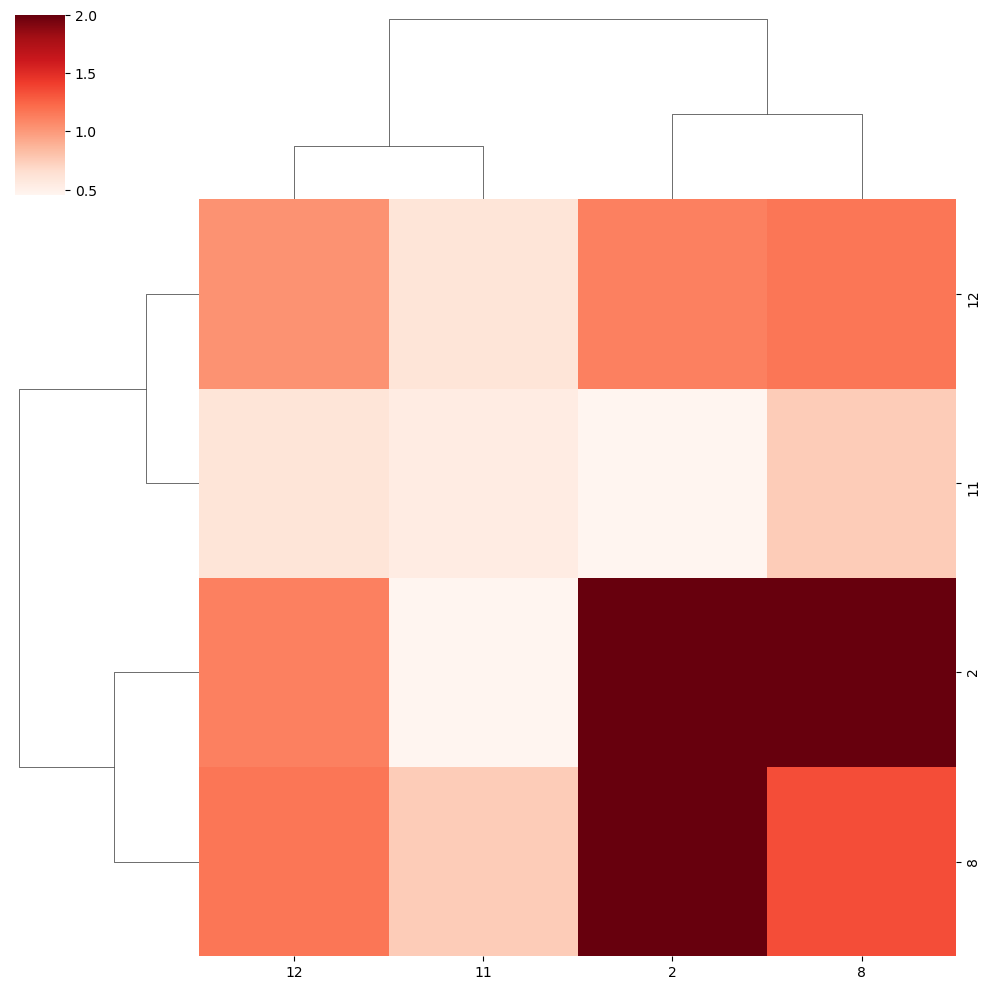

In [21]:
sns.clustermap(np.exp(-zz_df / zz_df.abs().max().max()), cmap='Reds', method='ward', vmax=2.0)

### Plot couplings on an UMAP - Figure S5L

In [22]:
uniq_labels = adata.obs['leiden_sub'].astype(int).unique()
_normalized_cluster_df = pd.DataFrame(np.zeros((len(uniq_labels), len(uniq_labels))), index=uniq_labels, columns = uniq_labels)
for i in zz_df.index:
    for j in zz_df.columns:
        _normalized_cluster_df.loc[i, j] = (zz_df.max().max() - zz_df).loc[i, j]

df=_normalized_cluster_df
min_prop = 0.0
weight=1.0
cluster_column='leiden_sub'
title=f'Evolutionary Coupling, {tumor}'
umap_coords = pd.DataFrame(adata.obsm['X_umap'], index = adata.obs_names)
paga_pos = {}
for n, g in adata.obs.groupby(cluster_column):

    paga_pos[int(n)] = umap_coords.loc[g.index].mean(0).values

adjacency_solid = df.fillna(0).copy()
adjacency_solid.index = [int(n) for n in adjacency_solid.index]
adjacency_solid.columns = [int(n) for n in adjacency_solid.columns]
adjacency_solid = adjacency_solid.loc[adjacency_solid.index, adjacency_solid.columns]
adjacency_solid.columns

Int64Index([9, 13, 3, 8, 5, 10, 2, 11, 12, 4, 6, 14, 1, 7, 0, 15], dtype='int64')

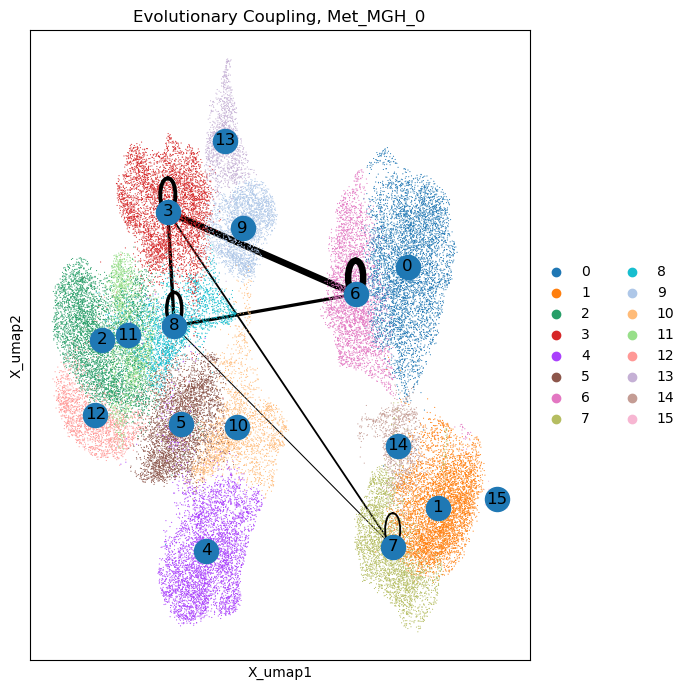

In [23]:
import matplotlib as mpl
import sys
import ete3
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import numba
import numpy as np
import pandas as pd
import scanpy as sc
adjacency_solid[adjacency_solid < min_prop] = 0.0

base_edge_width = weight * mpl.rcParams['lines.linewidth']

nx_g_solid = nx.Graph(adjacency_solid.values)

widths = [x[-1]['weight'] for x in nx_g_solid.edges(data=True)]
widths = base_edge_width * np.array(widths)

h = plt.figure(figsize=(7,7))
ax = plt.gca()
nx.draw_networkx_nodes(nx_g_solid, paga_pos, ax=ax)
nx.draw_networkx_labels(nx_g_solid, paga_pos, ax=ax)
nx.draw_networkx_edges(
                nx_g_solid, paga_pos, ax=ax, width=widths, edge_color='black'
            )
sc.pl.embedding(adata, basis='X_umap', color=cluster_column, ax=ax, show=False)
if title:
    plt.title(title)
plt.tight_layout()
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [24]:
afsdf

NameError: name 'afsdf' is not defined

In [ ]:
uniq_labels = adata.obs['leiden_sub'].astype(int).unique()
_normalized_cluster_df = pd.DataFrame(np.zeros((len(uniq_labels), len(uniq_labels))), index=uniq_labels, columns = uniq_labels)
for i in zz_df.index:
    for j in zz_df.columns:
        _normalized_cluster_df.loc[i, j] = (zz_df.max().max() - zz_df).loc[i, j]

tree_utilities.plot_graph_on_umap(adata, _normalized_cluster_df, weight=1,cluster_column = 'leiden_sub', title=f'Evolutionary Coupling, {tumor}')



KeyError: '[14] not in index'

## Compare evolutionary couplings from different methods - Figure S5A-E

Phylogenetic distance matrices were computed using `./scripts/compute_dissimilarity_matrices.py`

In [ ]:
tumor = 'Met_MGH_2'
K = 10

graph = tree_utilities.prepare_tumor_tree(tumor, adata,
                                          tree_dir = f"{data_directory}/allele/trees",
                                          FILTER_PROP=0.025,
                                          column='leiden_sub')

phylogenetic_distance_matrix = pd.read_csv(f'./data/{tumor}_phylogenetic_distance_matrix.tsv', sep='\t', index_col = 0)
edit_distance_matrix = pd.read_csv(f'./data/{tumor}_edit_distance_matrix.tsv', sep='\t', index_col = 0)

_leaves = np.intersect1d(phylogenetic_distance_matrix.index.values, [n for n in graph if graph.out_degree(n) == 0])
_leaves = np.intersect1d(_leaves, adata.obs_names)

leaf_states = adata.obs.loc[_leaves, 'leiden_sub']

phylogenetic_distance_matrix = phylogenetic_distance_matrix.loc[_leaves, _leaves]
edit_distance_matrix = edit_distance_matrix.loc[_leaves, _leaves]

phylo_inter_cluster_df = tree_utilities.get_inter_cluster_df(leaf_states, phylogenetic_distance_matrix)
edit_inter_cluster_df = tree_utilities.get_inter_cluster_df(leaf_states, edit_distance_matrix)
kth_inter_cluster_df = tree_utilities.get_inter_cluster_df(leaf_states, phylogenetic_distance_matrix, tree_utilities.average_nn_dist, k = K)

In [ ]:
B = 500
phylo_background = defaultdict(list)
edit_background = defaultdict(list)
kth_background = defaultdict(list)

for _ in tqdm(range(B)):
    permuted_assignments = leaf_states.copy()
    permuted_assignments.index = np.random.permutation(leaf_states.index.values)
    bg_df = tree_utilities.get_inter_cluster_df(permuted_assignments, phylogenetic_distance_matrix)
    
    for s1 in bg_df.index:
        for s2 in bg_df.index:
            phylo_background[(s1, s2)].append(bg_df.loc[s1, s2])
            
    bg_df = tree_utilities.get_inter_cluster_df(permuted_assignments, edit_distance_matrix)
    
    for s1 in bg_df.index:
        for s2 in bg_df.index:
            edit_background[(s1, s2)].append(bg_df.loc[s1, s2])
            
    bg_df = tree_utilities.get_inter_cluster_df(permuted_assignments, phylogenetic_distance_matrix, func=tree_utilities.average_nn_dist, k=K)
    
    for s1 in bg_df.index:
        for s2 in bg_df.index:
            kth_background[(s1, s2)].append(bg_df.loc[s1, s2])
            
phylo_null_means = phylo_inter_cluster_df.copy()
phylo_null_sds = phylo_inter_cluster_df.copy()

edit_null_means = edit_inter_cluster_df.copy()
edit_null_sds = edit_inter_cluster_df.copy()

kth_null_means = kth_inter_cluster_df.copy()
kth_null_sds = kth_inter_cluster_df.copy()


for s1 in phylo_null_means.index:
    for s2 in phylo_null_means.columns:
        phylo_null_means.loc[s1, s2] = np.mean(phylo_background[(s1, s2)])
        phylo_null_sds.loc[s1, s2] = np.std(phylo_background[(s1, s2)])
        
        edit_null_means.loc[s1, s2] = np.mean(edit_background[(s1, s2)])
        edit_null_sds.loc[s1, s2] = np.std(edit_background[(s1, s2)])
        
        kth_null_means.loc[s1, s2] = np.mean(kth_background[(s1, s2)])
        kth_null_sds.loc[s1, s2] = np.std(kth_background[(s1, s2)])

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
phylo_zscores = phylo_inter_cluster_df.copy()
edit_zscores = edit_inter_cluster_df.copy()
kth_zscores = kth_inter_cluster_df.copy()

for ind in phylo_zscores.index:
    for col in phylo_zscores.columns:
        phylo_zscores.loc[ind, col] = (phylo_zscores.loc[ind, col] - phylo_null_means.loc[ind, col]) / phylo_null_sds.loc[ind, col]
        edit_zscores.loc[ind, col] = (edit_zscores.loc[ind, col] - edit_null_means.loc[ind, col]) / edit_null_sds.loc[ind, col]
        kth_zscores.loc[ind, col] = (kth_zscores.loc[ind, col] - kth_null_means.loc[ind, col]) / kth_null_sds.loc[ind, col]
        
phylo_zscores.fillna(0, inplace=True)
edit_zscores.fillna(0, inplace=True)
kth_zscores.fillna(0, inplace=True)

mu = np.mean(phylo_zscores.values.ravel())
sigma = np.std(phylo_zscores.values.ravel())
phylo_zscores_norm = phylo_zscores.apply(lambda x: (x - mu) / sigma, axis=1)

mu = np.mean(edit_zscores.values.ravel())
sigma = np.std(edit_zscores.values.ravel())
edit_zscores_norm = edit_zscores.apply(lambda x: (x - mu) / sigma, axis=1)

mu = np.mean(kth_zscores.values.ravel())
sigma = np.std(kth_zscores.values.ravel())
kth_zscores_norm = kth_zscores.apply(lambda x: (x - mu) / sigma, axis=1)

Text(0.5, 1.0, 'Met_MGH_2, corr: 0.9669')

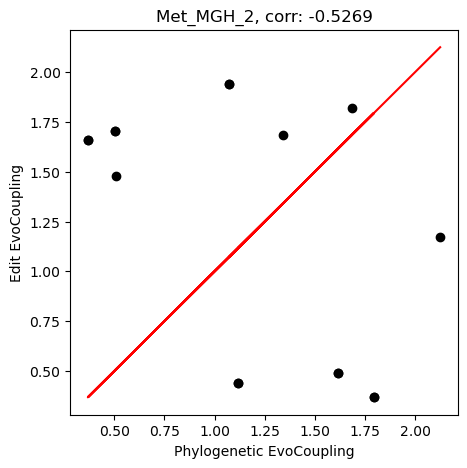

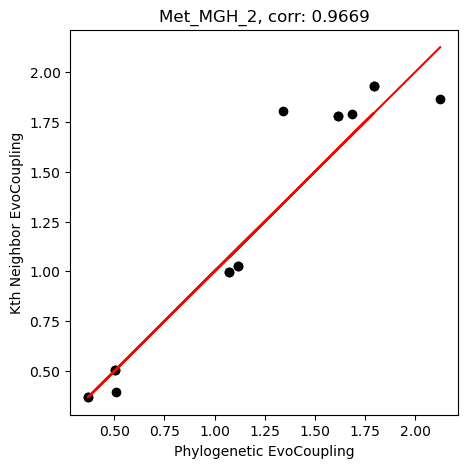

In [ ]:
pscores = np.exp(-phylo_zscores_norm / phylo_zscores_norm.abs().max().max())
escores = np.exp(-edit_zscores_norm / edit_zscores_norm.abs().max().max())
kscores = np.exp(-kth_zscores_norm / kth_zscores_norm.abs().max().max())

corr = round(stats.pearsonr(pscores.values.ravel(), escores.values.ravel())[0],4)


h = plt.figure(figsize=(5,5))
plt.scatter(pscores.loc[edit_zscores_norm.index, edit_zscores_norm.columns].values.ravel(), escores.values.ravel(), color='black')
plt.plot(pscores.values.ravel(), pscores.values.ravel(), color='red')
plt.xlabel("Phylogenetic EvoCoupling")
plt.ylabel("Edit EvoCoupling")
plt.title(f"{tumor}, corr: {corr}")

corr = round(stats.pearsonr(pscores.values.ravel(), kscores.values.ravel())[0],4)

h = plt.figure(figsize=(5,5))
plt.scatter(pscores.loc[kscores.index, kscores.columns].values.ravel(), kscores.values.ravel(), color='black')
plt.plot(pscores.values.ravel(), pscores.values.ravel(), color='red')
plt.xlabel("Phylogenetic EvoCoupling")
plt.ylabel("Kth Neighbor EvoCoupling")
plt.title(f"{tumor}, corr: {corr}")

### Evaluate correlations across all tumors -- Figure S5E

All evolutionary couplings were computed with the script in `./scripts/compute_evolutionary_couplings.py`

In [ ]:
adata.obs

,sample,type,batch,cellBC,Tumor,A,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_sub,cell names
L2.AAACCCAAGAACAGGA,CTR_MGH,MGH,0,NA,NA,L2.AAACCCAAGAACAGGA,5861,5861,20294.0,1872.0,9.224401,2,5,L2.AAACCCAAGAACAGGA
L2.AAACCCACAACAAGAT,CTR_MGH,MGH,0,L2.AAACCCACAACAAGAT,CTR_MGH_1,L2.AAACCCACAACAAGAT,7036,7036,41330.0,10.0,0.024195,2,5,L2.AAACCCACAACAAGAT
L2.AAACCCACAAGTTCCA,CTR_MGH,MGH,0,L2.AAACCCACAAGTTCCA,CTR_MGH_3,L2.AAACCCACAAGTTCCA,8377,8377,58511.0,2219.0,3.792449,7,2,L2.AAACCCACAAGTTCCA
L2.AAACCCACAATTCACG,CTR_MGH,MGH,0,L2.AAACCCACAATTCACG,CTR_MGH_4,L2.AAACCCACAATTCACG,4887,4887,18558.0,1948.0,10.496820,18,2,L2.AAACCCACAATTCACG
L2.AAACCCACAATTTCCT,CTR_MGH,MGH,0,L2.AAACCCACAATTTCCT,CTR_MGH_3,L2.AAACCCACAATTTCCT,6824,6824,37945.0,833.0,2.195283,5,2,L2.AAACCCACAATTTCCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3.TTTGTTGCACAGTCAT,Met_MGH,MGH,3,L3.TTTGTTGCACAGTCAT,Met_MGH_1,L3.TTTGTTGCACAGTCAT,7178,7178,54679.0,1075.0,1.966020,1,1,L3.TTTGTTGCACAGTCAT
L3.TTTGTTGGTCATTGCA,Met_MGH,MGH,3,L3.TTTGTTGGTCATTGCA,Met_MGH_1,L3.TTTGTTGGTCATTGCA,7576,7576,62927.0,1208.0,1.919685,1,1,L3.TTTGTTGGTCATTGCA
L3.TTTGTTGGTCCTCCAT,Met_MGH,MGH,3,L3.TTTGTTGGTCCTCCAT,Met_MGH_1,L3.TTTGTTGGTCCTCCAT,8052,8052,46108.0,1098.0,2.381366,14,1,L3.TTTGTTGGTCCTCCAT
L3.TTTGTTGGTTTGGAGG,Met_MGH,MGH,3,L3.TTTGTTGGTTTGGAGG,Met_MGH_1,L3.TTTGTTGGTTTGGAGG,6751,6751,43367.0,1650.0,3.804736,14,1,L3.TTTGTTGGTTTGGAGG


In [ ]:
adata.obs

,sample,type,batch,cellBC,Tumor,A,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_sub,cell names
L2.AAACCCAAGAACAGGA,CTR_MGH,MGH,0,NA,NA,L2.AAACCCAAGAACAGGA,5861,5861,20294.0,1872.0,9.224401,2,5,L2.AAACCCAAGAACAGGA
L2.AAACCCACAACAAGAT,CTR_MGH,MGH,0,L2.AAACCCACAACAAGAT,CTR_MGH_1,L2.AAACCCACAACAAGAT,7036,7036,41330.0,10.0,0.024195,2,5,L2.AAACCCACAACAAGAT
L2.AAACCCACAAGTTCCA,CTR_MGH,MGH,0,L2.AAACCCACAAGTTCCA,CTR_MGH_3,L2.AAACCCACAAGTTCCA,8377,8377,58511.0,2219.0,3.792449,7,2,L2.AAACCCACAAGTTCCA
L2.AAACCCACAATTCACG,CTR_MGH,MGH,0,L2.AAACCCACAATTCACG,CTR_MGH_4,L2.AAACCCACAATTCACG,4887,4887,18558.0,1948.0,10.496820,18,2,L2.AAACCCACAATTCACG
L2.AAACCCACAATTTCCT,CTR_MGH,MGH,0,L2.AAACCCACAATTTCCT,CTR_MGH_3,L2.AAACCCACAATTTCCT,6824,6824,37945.0,833.0,2.195283,5,2,L2.AAACCCACAATTTCCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3.TTTGTTGCACAGTCAT,Met_MGH,MGH,3,L3.TTTGTTGCACAGTCAT,Met_MGH_1,L3.TTTGTTGCACAGTCAT,7178,7178,54679.0,1075.0,1.966020,1,1,L3.TTTGTTGCACAGTCAT
L3.TTTGTTGGTCATTGCA,Met_MGH,MGH,3,L3.TTTGTTGGTCATTGCA,Met_MGH_1,L3.TTTGTTGGTCATTGCA,7576,7576,62927.0,1208.0,1.919685,1,1,L3.TTTGTTGGTCATTGCA
L3.TTTGTTGGTCCTCCAT,Met_MGH,MGH,3,L3.TTTGTTGGTCCTCCAT,Met_MGH_1,L3.TTTGTTGGTCCTCCAT,8052,8052,46108.0,1098.0,2.381366,14,1,L3.TTTGTTGGTCCTCCAT
L3.TTTGTTGGTTTGGAGG,Met_MGH,MGH,3,L3.TTTGTTGGTTTGGAGG,Met_MGH_1,L3.TTTGTTGGTTTGGAGG,6751,6751,43367.0,1650.0,3.804736,14,1,L3.TTTGTTGGTTTGGAGG


In [ ]:
adata.obs['Tumor'].unique()

['NA', 'CTR_MGH_1', 'CTR_MGH_3', 'CTR_MGH_4', 'CTR_MGH_6', ..., 'MI_MGH_0', 'MI_MGH_3', 'Met_MGH_2', 'Met_MGH_0', 'Met_MGH_3']
Length: 28
Categories (28, object): ['CTR_MGH_0', 'CTR_MGH_1', 'CTR_MGH_2', 'CTR_MGH_3', ..., 'NMI_MGH_3', 'NMI_MGH_4', 'NMI_MGH_5', 'NMI_MGH_6']

In [ ]:
a11=adata.obs['Tumor'].unique()

for tumor in tqdm(adata.obs['Tumor'].unique()):
    #print(tumor)
    if 'MGH' not in tumor:#作用只要MGH
        continue
    print(tumor)

  0%|          | 0/28 [00:00<?, ?it/s]

CTR_MGH_1
CTR_MGH_3
CTR_MGH_4
CTR_MGH_6
CTR_MGH_2
CTR_MGH_8
CTR_MGH_9
CTR_MGH_0
CTR_MGH_12
CTR_MGH_7
CTR_MGH_10
CTR_MGH_5
CTR_MGH_11
NMI_MGH_5
NMI_MGH_2
NMI_MGH_3
NMI_MGH_4
NMI_MGH_6
Met_MGH_1
NMI_MGH_0
MI_MGH_1
MI_MGH_2
MI_MGH_0
MI_MGH_3
Met_MGH_2
Met_MGH_0
Met_MGH_3


In [ ]:
phylo_vs_edit_corr = []
phylo_vs_knn_corr = []

for tumor in tqdm(adata.obs['Tumor'].unique()):
    #print(tumor)
    if 'MGH' not in tumor:#作用只要MGH
        continue
    print(tumor)
    phylo_couplings_fp = f'./data/evolutionary_coupling.{tumor}.txt'
    if not os.path.exists(phylo_couplings_fp):
        continue
       
    phylo_couplings = pd.read_csv(f'./data/evolutionary_coupling.{tumor}.txt', sep='\t', index_col = 0)
    edit_couplings = pd.read_csv(f'./data/evolutionary_coupling.{tumor}.edit_preprocessed.txt', sep='\t', index_col = 0)
    knn_couplings = pd.read_csv(f'./data/evolutionary_coupling.{tumor}.knn_preprocessed.txt', sep='\t', index_col = 0)
    
    pscores = np.exp(-phylo_couplings / phylo_couplings.abs().max().max())
    escores = np.exp(-edit_couplings / edit_couplings.abs().max().max())
    kscores = np.exp(-knn_couplings / knn_couplings.abs().max().max())

    escores = escores.loc[pscores.index, pscores.columns]
    kscores = kscores.loc[pscores.index, pscores.columns]

    if len(pscores) < 4:
        continue
    
    edit_corr = round(stats.pearsonr(pscores.values.ravel(), escores.values.ravel())[0],4)
    phylo_vs_edit_corr.append(edit_corr)
    
    knn_corr = round(stats.pearsonr(pscores.values.ravel(), kscores.values.ravel())[0],4)
    phylo_vs_knn_corr.append(knn_corr)


  0%|          | 0/28 [00:00<?, ?it/s]

CTR_MGH_1
CTR_MGH_3
CTR_MGH_4
CTR_MGH_6
CTR_MGH_2
CTR_MGH_8
CTR_MGH_9
CTR_MGH_0
CTR_MGH_12
CTR_MGH_7
CTR_MGH_10
CTR_MGH_5
CTR_MGH_11
NMI_MGH_5
NMI_MGH_2
NMI_MGH_3
NMI_MGH_4
NMI_MGH_6
Met_MGH_1
NMI_MGH_0
MI_MGH_1
MI_MGH_2
MI_MGH_0
MI_MGH_3
Met_MGH_2
Met_MGH_0
Met_MGH_3


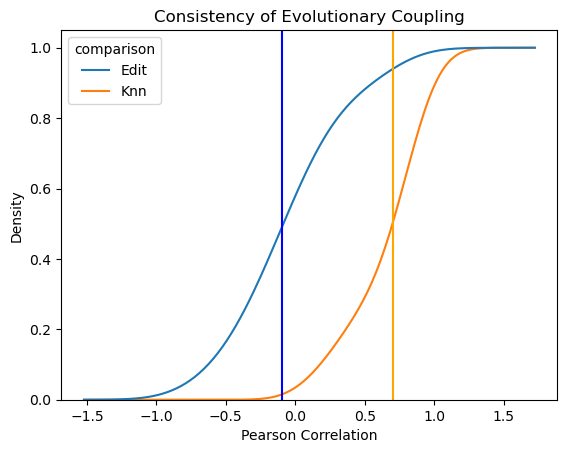

In [ ]:
all_correlations = pd.DataFrame([phylo_vs_edit_corr + phylo_vs_knn_corr], index=['correlation']).T
all_correlations['comparison'] = ['Edit']*len(phylo_vs_edit_corr) + ['Knn']*len(phylo_vs_knn_corr)

sns.kdeplot(
    data = all_correlations, x = 'correlation', hue='comparison',
    cumulative=True, common_norm=False, common_grid=True, 
)

plt.axvline(np.median(phylo_vs_edit_corr), color='blue')
plt.axvline(np.median(phylo_vs_knn_corr), color='orange')
plt.title("Consistency of Evolutionary Coupling")
plt.xlabel("Pearson Correlation")
plt.ylabel("Density")
plt.show()


## Analyze Fate Clusters

To do so, we'll use the evolutionary couplings that were computed with `./scripts/compute_evolutionary_couplings.py`

### Hierarchically cluster tumors by Evolutionary Coupling -- Figure S5F

In [ ]:
cluster_column = 'leiden_sub'

tumor_z_df_vectors = {}
tumor_z_scores = {}
uniq_labels = adata.obs[cluster_column].astype(int).unique()
tumor_z_df = {}

for tumor in tqdm(adata.obs['Tumor'].unique()):
    #
    if 'MGH' not in tumor:#作用只要MGH
        continue

    print(tumor)

    
    evolutionary_coupling_fp = f'./data/evolutionary_coupling.{tumor}.txt'
    if not os.path.exists(evolutionary_coupling_fp):
        continue
    
    z_df = pd.read_csv(evolutionary_coupling_fp, sep='\t', index_col = 0)
    z_df.columns = z_df.columns.astype(int)
    z_df.index = z_df.index.astype(int)
    tumor_z_df[tumor] = z_df.copy()
    
    _z_df = pd.DataFrame(np.zeros((len(uniq_labels), len(uniq_labels))), index=uniq_labels, columns = uniq_labels)

    z_scores = pd.DataFrame(np.zeros((len(uniq_labels), len(uniq_labels))), index=uniq_labels, columns = uniq_labels)
    for i in z_df.index:
        for j in z_df.columns:
            _z_df.loc[i, j] = np.exp(-z_df.loc[i ,j])
            z_scores.loc[i, j] = z_df.loc[i, j]
    
    vector = []
    z_vector = []
    labels = []
    inds = _z_df.index
                
    for _i in range(len(uniq_labels)):
        i = inds[_i]
        for _j in range(_i+1, len(uniq_labels)):
            j = inds[_j]
            if i == j:
                vector.append(0)
                z_vector.append(z_scores.loc[i, j])
            elif np.isnan(_z_df.loc[i, j]):
                vector.append(0)
                z_vector.append(0)
            else:
                vector.append(_z_df.loc[i,j])
                z_vector.append(z_scores.loc[i, j])

    cluster_composition = adata.obs.loc[adata.obs['Tumor'] == tumor, cluster_column].value_counts()
    obs_cluster_composition = cluster_composition.loc[[str(c) for c in z_df.index.values]]
    for cluster in uniq_labels:
        if str(cluster) in obs_cluster_composition.index:
            vector.append(obs_cluster_composition.loc[str(cluster)] / obs_cluster_composition.sum())
        else:
            vector.append(0)
    
    tumor_z_df_vectors[tumor] = vector
    tumor_z_scores[tumor] = z_vector

labels = []
z_labels = []
for _i in range(len(uniq_labels)):
    i = inds[_i]
    for _j in range(_i+1, len(uniq_labels)):
        j = inds[_j]
        labels.append(f"({i},{j})")
        z_labels.append(f"({i},{j})")
        
for cluster in uniq_labels:
    labels.append(str(cluster))
    
tumor_z_df_all = pd.DataFrame.from_dict(tumor_z_df_vectors, orient='index', columns = labels)
tumor_z_scores = pd.DataFrame.from_dict(tumor_z_scores, orient='index', columns = z_labels)

  0%|          | 0/28 [00:00<?, ?it/s]

CTR_MGH_1
CTR_MGH_3
CTR_MGH_4
CTR_MGH_6
CTR_MGH_2
CTR_MGH_8
CTR_MGH_9
CTR_MGH_0
CTR_MGH_12
CTR_MGH_7
CTR_MGH_10
CTR_MGH_5
CTR_MGH_11
NMI_MGH_5
NMI_MGH_2
NMI_MGH_3
NMI_MGH_4
NMI_MGH_6
Met_MGH_1
NMI_MGH_0
MI_MGH_1
MI_MGH_2
MI_MGH_0
MI_MGH_3
Met_MGH_2
Met_MGH_0
Met_MGH_3


In [ ]:
tumor_clone_statistics = pd.read_csv(f"{data_directory}/allele/tumor_statistics.tsv", sep='\t', index_col = 0)
tumor_clone_statistics

,PercentUnique,CutRate,NumSaturatedTargets,PercentUnsaturatedTargets,NumCells
CTR_MGH_0,0.793814,0.383991,62,0.261905,97
CTR_MGH_1,0.600062,0.703557,7,0.666667,3228
CTR_MGH_10,0.312500,0.346821,5,0.583333,64
CTR_MGH_11,0.750000,0.307692,4,0.733333,40
CTR_MGH_12,0.947368,0.463942,6,0.666667,38
CTR_MGH_2,0.863495,0.389690,31,0.483333,1934
CTR_MGH_3,0.687943,0.535248,7,0.611111,423
CTR_MGH_4,0.862069,0.581589,14,0.481481,406
CTR_MGH_5,0.855769,0.180654,44,0.435897,104
CTR_MGH_6,0.371429,0.617486,45,0.062500,70


In [ ]:
NUM_CELLS_THRESH = 5


#tumor_clone_statistics = pd.read_csv(f"{data_directory}/tumor_statistics.tsv", sep='\t', index_col = 0)

unfiltered = np.intersect1d(tumor_clone_statistics[(tumor_clone_statistics['NumCells'] >= NUM_CELLS_THRESH)].index, tumor_z_df_all.index)
#unfiltered = tumor_clone_statistics[(tumor_clone_statistics['NumCells'] >= NUM_CELLS_THRESH)].index
unfiltered

array(['CTR_MGH_0', 'CTR_MGH_1', 'CTR_MGH_10', 'CTR_MGH_11', 'CTR_MGH_12',
       'CTR_MGH_2', 'CTR_MGH_3', 'CTR_MGH_4', 'CTR_MGH_5', 'CTR_MGH_6',
       'CTR_MGH_7', 'CTR_MGH_8', 'CTR_MGH_9', 'MI_MGH_0', 'MI_MGH_1',
       'MI_MGH_2', 'MI_MGH_3', 'Met_MGH_0', 'Met_MGH_2', 'NMI_MGH_0',
       'NMI_MGH_2', 'NMI_MGH_3', 'NMI_MGH_4', 'NMI_MGH_5', 'NMI_MGH_6'],
      dtype=object)

In [ ]:
tumor_z_df_all

,"(5,2)","(5,7)","(5,8)","(5,4)","(5,1)","(5,9)","(5,3)","(5,6)","(5,0)","(2,7)",...,5,2,7,8,4,1,9,3,6,0
CTR_MGH_1,2.365036,0.000000,0.250698,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.605502,0.028155,0.000000,0.366343,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_3,0.268597,1.300096,4.450095,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.316522,...,0.201995,0.488778,0.147132,0.162095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_6,0.946729,3.483365,0.000000,0.642897,0.000000,0.0,0.000000,0.000000,0.000000,2.806135,...,0.059459,0.816216,0.075676,0.000000,0.048649,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_8,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.971429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571
CTR_MGH_9,0.330626,0.265158,0.000000,0.889004,0.000000,0.0,0.000000,0.000000,0.000000,0.804873,...,0.048387,0.830645,0.088710,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.061358,...,0.000000,0.783217,0.188811,0.027972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CTR_MGH_12,0.813949,0.818915,0.000000,1.597774,0.000000,0.0,0.288162,1.589992,0.000000,6.864124,...,0.081081,0.783784,0.054054,0.000000,0.027027,0.000000,0.000000,0.027027,0.027027,0.000000
CTR_MGH_7,0.177377,1.785430,0.373548,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,3.102668,...,0.366279,0.389535,0.093023,0.151163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
tumor_z_df_nt = tumor_z_df_all.loc[unfiltered]

tmat_z = tumor_z_df_nt \
    .subtract(tumor_z_df_nt.mean(axis=1), axis=0) \
    .divide(tumor_z_df_nt.std(axis=1), axis=0)

tmat_z = np.nan_to_num(tmat_z)

In [ ]:

fate_to_color = {1: "#022e60",
                2: "#1cecdc",
                3: "#c30000",
                4: "#9bb7d4",
                5: "#efbc74"}

tumor_hierarchy = hierarchy.linkage(
    distance.pdist(tmat_z, metric='euclidean'), method='ward')

hierarchical_clusters = hierarchy.fcluster(tumor_hierarchy, t=3, criterion="maxclust")

tumor_to_cluster = {}
for i, tumor in zip(range(len(tumor_z_df_nt.index)), tumor_z_df_nt.index):
    tumor_to_cluster[tumor] = hierarchical_clusters[i]

colors = pd.DataFrame.from_dict({tumor: fate_to_color[tumor_to_cluster[tumor]] for tumor in tumor_z_df_nt.index}, orient='index', columns = ['Fate-Cluster'])




In [ ]:
colors

,Fate-Cluster
CTR_MGH_0,#c30000
CTR_MGH_1,#c30000
CTR_MGH_10,#c30000
CTR_MGH_11,#c30000
CTR_MGH_12,#c30000
CTR_MGH_2,#1cecdc
CTR_MGH_3,#c30000
CTR_MGH_4,#1cecdc
CTR_MGH_5,#1cecdc
CTR_MGH_6,#c30000


In [ ]:
pd.DataFrame(tmat_z, index = tumor_z_df_nt.index, columns = tumor_z_df_nt.columns)

,"(5,2)","(5,7)","(5,8)","(5,4)","(5,1)","(5,9)","(5,3)","(5,6)","(5,0)","(2,7)",...,5,2,7,8,4,1,9,3,6,0
CTR_MGH_0,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,6.585417,...,-0.228646,2.360370,0.395492,-0.136181,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646,-0.228646
CTR_MGH_1,6.368167,-0.238413,0.461897,-0.238413,-0.238413,-0.238413,-0.238413,-0.238413,-0.238413,-0.238413,...,1.453018,-0.159763,-0.238413,0.784943,-0.238413,-0.238413,-0.238413,-0.238413,-0.238413,-0.238413
CTR_MGH_10,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,6.464779,...,-0.236797,1.668853,0.239615,-0.236797,-0.236797,-0.236797,-0.236797,-0.236797,-0.157395,-0.236797
CTR_MGH_11,5.980753,-0.253794,1.593563,-0.253794,-0.253794,-0.253794,-0.253794,-0.253794,-0.253794,-0.253794,...,0.016146,3.075469,-0.253794,0.016146,-0.253794,-0.253794,-0.253794,-0.253794,-0.253794,-0.253794
CTR_MGH_12,0.167215,0.170201,-0.322295,0.638608,-0.322295,-0.322295,-0.148994,0.633928,-0.322295,3.805797,...,-0.273533,0.149073,-0.289787,-0.322295,-0.306041,-0.322295,-0.322295,-0.306041,-0.306041,-0.322295
CTR_MGH_2,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,...,-0.134840,7.281359,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840
CTR_MGH_3,0.111803,1.590290,6.105301,-0.273187,-0.273187,-0.273187,-0.273187,-0.273187,-0.273187,0.180496,...,0.016341,0.427397,-0.062296,-0.040850,-0.273187,-0.273187,-0.273187,-0.273187,-0.273187,-0.273187
CTR_MGH_4,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,...,-0.134840,7.281359,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840,-0.134840
CTR_MGH_5,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,2.755577,...,-0.197796,6.595399,0.934403,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796,-0.197796
CTR_MGH_6,1.231722,5.310385,-0.290525,0.743191,-0.290525,-0.290525,-0.290525,-0.290525,-0.290525,4.221466,...,-0.194920,1.021871,-0.168846,-0.290525,-0.212302,-0.290525,-0.290525,-0.290525,-0.290525,-0.290525


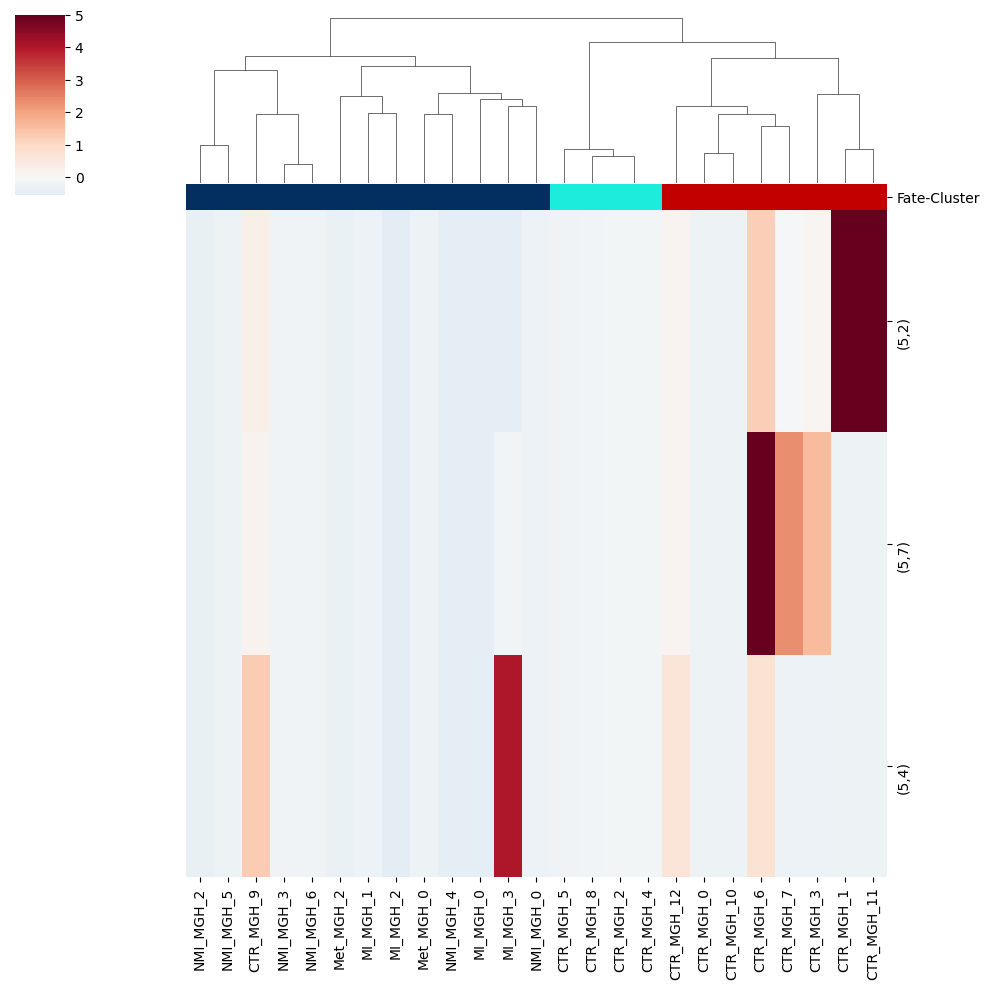

In [ ]:
# these rows were hand selected to best represent the separation 
row_order = ['(5,2)', "(5,7)", '(5,4)']

result = sns.clustermap(pd.DataFrame(tmat_z, index = tumor_z_df_nt.index, columns = tumor_z_df_nt.columns).T.loc[row_order], center = 0.0,
               cmap = 'RdBu_r', vmax=5, col_linkage=tumor_hierarchy, method='ward', row_cluster=False, col_colors=colors['Fate-Cluster'], figsize=(10, 10), annot_kws={'font_size': 3})

### Evaluate leiden cluster proportion by fate cluster - Figure S5G

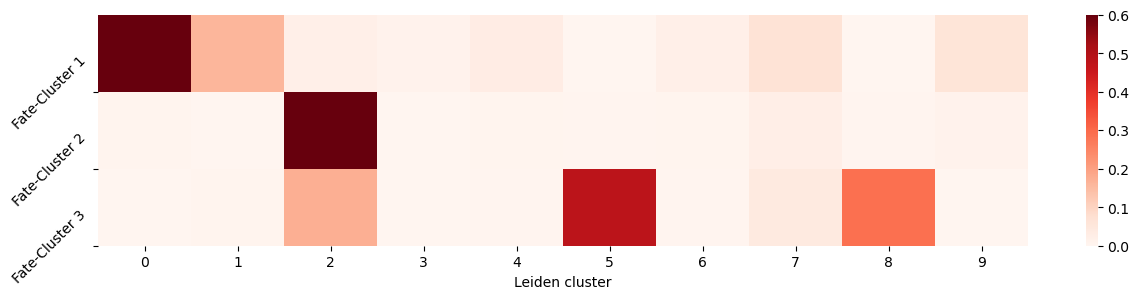

In [ ]:
leiden_assignments = adata.obs[['Tumor', 'leiden_sub']].copy()
leiden_assignments['fate_cluster'] = leiden_assignments['Tumor'].map(tumor_to_cluster)

fate_cluster_props = leiden_assignments.groupby(by = ['fate_cluster', 'leiden_sub']).size() / leiden_assignments.groupby(by = 'fate_cluster').size()
fate_cluster_props = fate_cluster_props.unstack()

h = plt.figure(figsize=(15, 3))
sns.heatmap(fate_cluster_props, cmap='Reds', vmin=0, vmax=0.6)
plt.yticks([1, 2, 3], ['Fate-Cluster 1', 'Fate-Cluster 2', 'Fate-Cluster 3'], rotation=45)
plt.ylabel(None)
plt.xlabel("Leiden cluster")
plt.show()

### Perform Dimensionality Reduction Anlaysis - Figures 5E and S5H,I

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


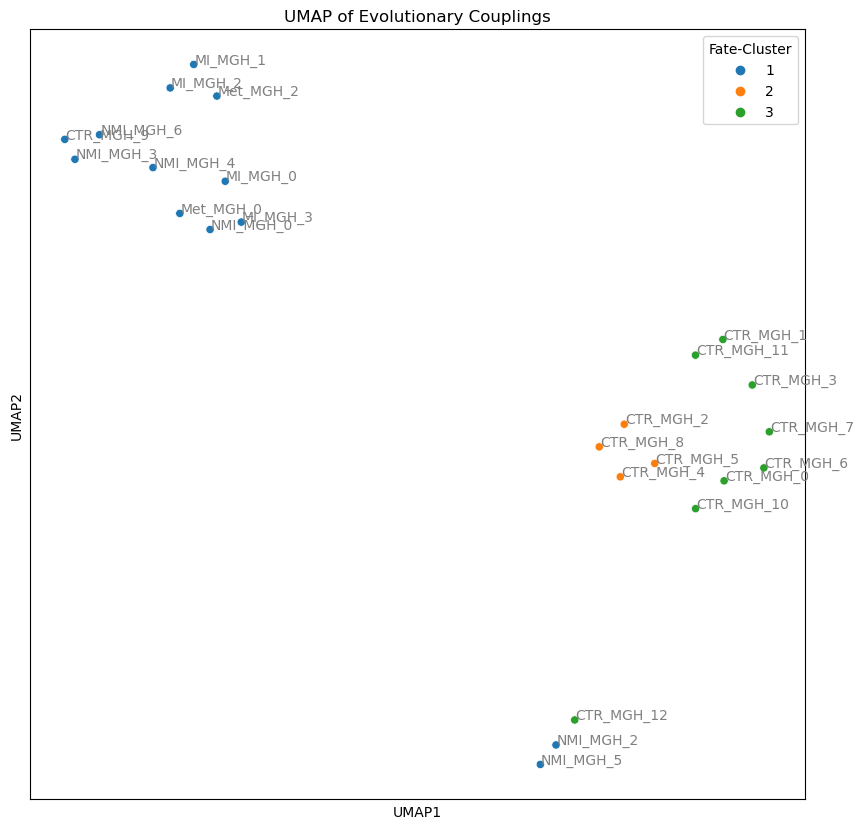

In [ ]:
import umap

seed = 2
labs = tumor_z_df_nt.index.values
reducer = umap.UMAP(n_neighbors=3, min_dist=0.2,
                    random_state=np.random.RandomState(seed), metric='euclidean')
embedding = reducer.fit_transform(tmat_z)

embedding_df = pd.DataFrame(embedding, index=tumor_z_df_nt.index.values, columns = ['UMAP1', 'UMAP2'])
embedding_df['Fate-Cluster'] = hierarchical_clusters
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=embedding_df, x='UMAP1', y='UMAP2', hue='Fate-Cluster', palette='tab10')
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
for i, label in zip(range(len(labs)), labs):
    plt.annotate(label, (embedding[i,0]+0.01, embedding[i,1]+0.01), color='grey')
plt.yticks([])
plt.xticks([])
plt.title("UMAP of Evolutionary Couplings")
plt.show()

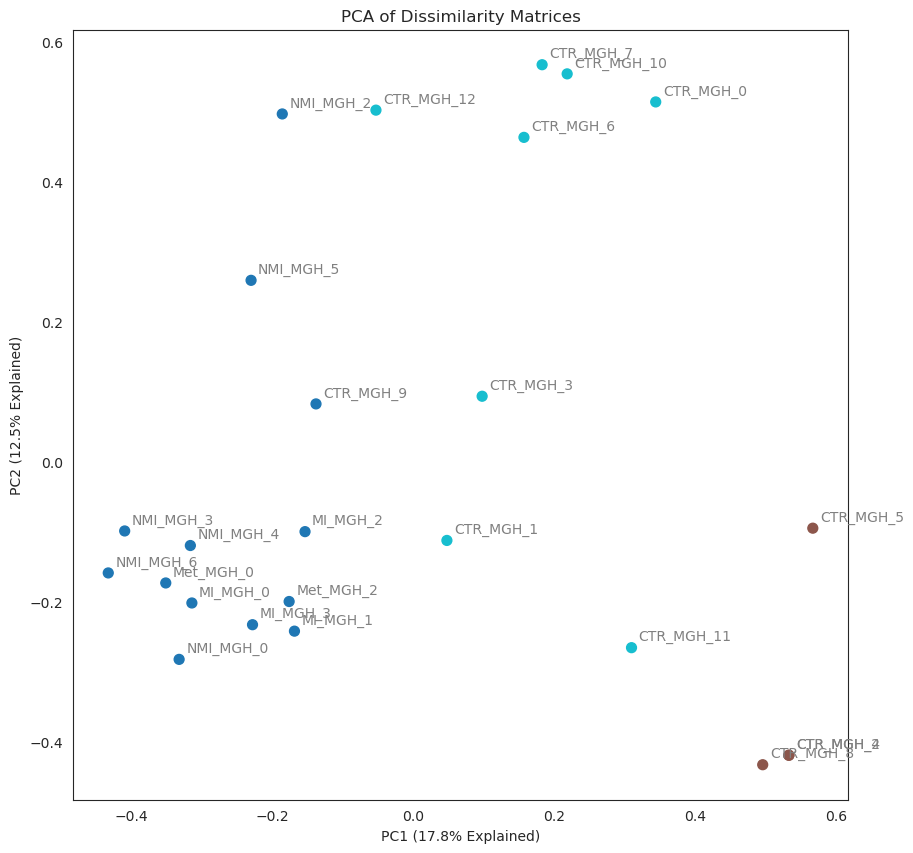

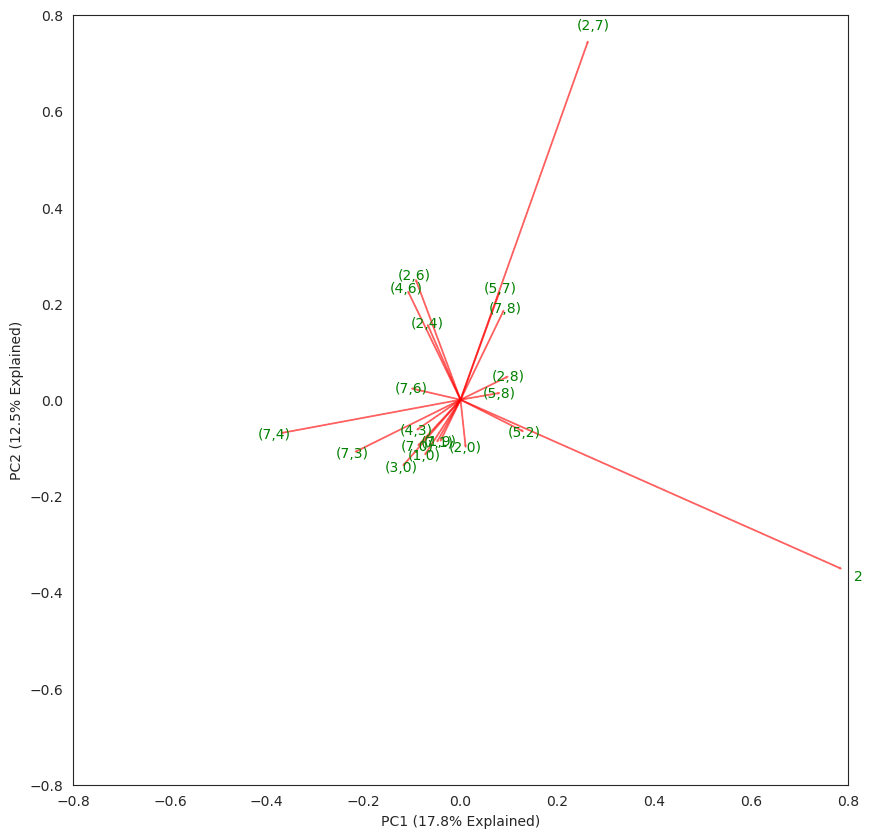

In [ ]:
pca = PCA()
tmat_transformed = pca.fit_transform(tmat_z)
var_explained = pca.explained_variance_ratio_

d1, d2 = 0,1

sns.set_style("white")
tumors = tumor_z_df_nt.index

x, y = tmat_transformed[:,d1], tmat_transformed[:, d2]
sizes = dict(zip(tumor_z_df_nt.index.values, x))
ss = dict(zip(tumor_z_df_nt.index.values, y))
labs = tumor_z_df_nt.index.values

scalex = 1.0/(x.max() - x.min())
scaley = 1.0/(y.max() - y.min())

h = plt.figure(figsize = (10, 10))
ax = plt.scatter(x*scalex, y*scaley, c=hierarchical_clusters[:], s=50, cmap = 'tab10')
plt.title("PCA of Dissimilarity Matrices")

for i in labs:
    plt.annotate(i, (sizes[i]*scalex+0.01, ss[i]*scaley+0.01), color='grey')

plt.xlabel("PC{} ({}% Explained)".format(d1+1, round(var_explained[d1]*100,1)))
plt.ylabel("PC{} ({}% Explained)".format(d2+1, round(var_explained[d2]*100,1)))
plt.show()


h = plt.figure(figsize = (10, 10))
coeff = np.transpose(pca.components_)

iis = np.argsort(np.abs(coeff[:, d1]))[::-1][:15]
iis = np.unique(np.concatenate((iis, np.argsort(np.abs(coeff[:, d2]))[::-1][:15])))
for i in iis:
    plt.arrow(0, 0, coeff[i,d1], coeff[i,d2], color = 'r',alpha = 0.5)
    plt.text(coeff[i,d1]* 1.05, coeff[i,d2] * 1.05, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlim(-0.8, 0.8)
plt.ylim(-0.8, 0.8)

plt.xlabel("PC{} ({}% Explained)".format(d1+1, round(var_explained[d1]*100,1)))
plt.ylabel("PC{} ({}% Explained)".format(d2+1, round(var_explained[d2]*100,1)))

plt.show()


## Phylotime analysis

Below, we compute the phylotimes for each cell in each tumor. Because there could be some minor stochasticity in the clustering assignments of tumors based on Evolutionary Coupling, we define the fate clusters identified in our manuscript below.

In [ ]:
def post_process_phylotimes(phylotimes, adata):
    
    phylotimes = phylotimes.dropna().copy()

    # perform smoothing
    phylotimes = phylotimes.replace([np.inf, -np.inf], np.nan).dropna()
    phylotimes = tree_utilities.perform_smoothing(phylotimes, adata, K = 20)
    phylotimes = phylotimes.replace([np.inf, -np.inf], np.nan).dropna()

    t1 = phylotimes.index.values
    bg = np.setdiff1d(adata.obs_names, t1)

    umap = pd.DataFrame(adata.obsm["X_umap"], index = adata.obs_names, columns = ['D1', 'D2'])
    _mi, _ma = phylotimes.min(), phylotimes.max()
    phylotimes = phylotimes.apply(lambda x: (x.distance-_mi) / (_ma - _mi), axis=1)

    phylotimes.dropna(inplace=True)

    t1 = phylotimes.index.values
    bg = np.setdiff1d(adata.obs_names, t1)

    vmin = np.percentile(phylotimes.values, 5)
    vmax = np.percentile(phylotimes.values, 90)

    t1 = phylotimes.index.values
    bg = np.setdiff1d(adata.obs_names, t1)

    umap = pd.DataFrame(adata.obsm["X_umap"], index = adata.obs_names, columns = ['D1', 'D2'])

    _mi, _ma = phylotimes.min(), phylotimes.max()
    phylotimes = phylotimes.apply(lambda x: (x.distance-_mi) / (_ma - _mi), axis=1)

    phylotimes.dropna(inplace=True)

    t1 = phylotimes.index.values
    bg = np.setdiff1d(adata.obs_names, t1)

    vmin = np.percentile(phylotimes.values, 5)
    vmax = np.percentile(phylotimes.values, 95)

    fig, ax = plt.subplots(figsize = (6,6))
    plt.scatter(umap.loc[bg, 'D1'], umap.loc[bg, 'D2'], c='lightgray', s=0.1)
    plt.scatter(umap.loc[t1, 'D1'], umap.loc[t1, 'D2'], c=phylotimes_bl.loc[t1].values, s=2, cmap = 'YlOrRd_r', vmin=vmin, vmax=vmax)

    plt.xlabel('UMAP 1')
    plt.ylabel("UMAP 2")
    plt.colorbar()
    ax.set_yticks([])
    ax.set_xticks([])
    plt.show()
    
    return phylotimes

In [ ]:
fate_cluster_to_tumors = {
    'fate_cluster1': ['CTR_MGH_0', 'CTR_MGH_1', 'CTR_MGH_10', 'CTR_MGH_11', 'CTR_MGH_12', 'CTR_MGH_2', 'CTR_MGH_3', 'CTR_MGH_4',  'CTR_MGH_7', 'CTR_MGH_8', 'CTR_MGH_9'],
    'fate_cluster2': ['CTR_MGH_6','Met_MGH_0','Met_MGH_2', 'MI_MGH_3', 'NMI_MGH_0', 'NMI_MGH_2', 'NMI_MGH_3', 'NMI_MGH_4', 'NMI_MGH_5', 'NMI_MGH_6',],
    'fate_cluster3': ['CTR_MGH_5', 'MI_MGH_0', 'MI_MGH_1', 'MI_MGH_2',  ],
}
fate_cluster_to_tumors

{'fate_cluster1': ['CTR_MGH_0',
  'CTR_MGH_1',
  'CTR_MGH_10',
  'CTR_MGH_11',
  'CTR_MGH_12',
  'CTR_MGH_2',
  'CTR_MGH_3',
  'CTR_MGH_4',
  'CTR_MGH_7',
  'CTR_MGH_8',
  'CTR_MGH_9'],
 'fate_cluster2': ['CTR_MGH_6',
  'Met_MGH_0',
  'Met_MGH_2',
  'MI_MGH_3',
  'NMI_MGH_0',
  'NMI_MGH_2',
  'NMI_MGH_3',
  'NMI_MGH_4',
  'NMI_MGH_5',
  'NMI_MGH_6'],
 'fate_cluster3': ['CTR_MGH_5', 'MI_MGH_0', 'MI_MGH_1', 'MI_MGH_2']}

In [ ]:
fate_cluster_to_tumors = {
    'fate_cluster1': ['3513_NT_T2', '3703_NT_T2', '3435_NT_T4', '3520_NT_T1',
                      '3513_NT_T5', '3435_NT_T6', '3513_NT_T4', '3730_NT_T2',
                      '3434_NT_T3', '3513_NT_T3', '3433_NT_T2', '3432_NT_T1',
                      '3432_NT_T2'],
    'fate_cluster2': ['3726_NT_T2', '3730_NT_T1', '3435_NT_T1', '3435_NT_T3'],
    'fate_cluster3': ['3434_NT_T1', '3724_NT_T1', '3513_NT_T1', '3430_NT_T1',
                      '3430_NT_T2', '3726_NT_T1'],
}

In [ ]:
cluster_column = 'leiden_sub'

tumors = fate_cluster_to_tumors['fate_cluster1']

at2 = '4'

phylotimes_capped = pd.DataFrame(columns=['distance'])
phylotimes_bl = pd.DataFrame(columns = ['distance'])
phylotimes_capped

,distance


In [ ]:
for tumor in tqdm(tumors):
    
    graph = tree_utilities.prepare_tumor_tree(tumor, adata,
                                              f'{data_directory}/allele/trees',
                                              column=cluster_column, FILTER_PROP=0.025, keep_branch_lengths = False)
        
    leaves = [n for n in graph if graph.out_degree(n) == 0]
    at2_cells = np.intersect1d(adata.obs[adata.obs[cluster_column] == at2].index, leaves)
        
    if len(at2_cells) <= 1:
        continue
    
    
    # compute phylotimes with 0-1 branch lenghts
    capped_distances = tree_utilities.compute_fitch_distance(graph, adata.obs[cluster_column], ground_state=at2)
    
    # compute branch-length distances
    graph = tree_utilities.prepare_tumor_tree(tumor, adata,
                                              f'{data_directory}/trees',
                                              column=cluster_column, FILTER_PROP=0.025, keep_branch_lengths = True)
    
    bl_distances = tree_utilities.compute_fitch_distance(graph, adata.obs[cluster_column], ground_state=at2)
    
    capped_distances.dropna(inplace=True)
    bl_distances.dropna(inplace=True)

    phylotimes_capped = pd.concat([phylotimes_capped, capped_distances])
    phylotimes_bl = pd.concat([phylotimes_bl, bl_distances])
phylotimes_capped

  0%|          | 0/13 [00:00<?, ?it/s]

NewickError: Unexisting tree file or Malformed newick tree structure.
You may want to check other newick loading flags like 'format' or 'quoted_node_names'.

In [ ]:






    
phylotimes_capped = post_process_phylotimes(phylotimes_capped, adata)
phylotimes_bl = post_process_phylotimes(phylotimes_bl, adata)

ValueError: Did not find X_scVI in `.obsm.keys()`. You need to compute it first.

### Compare phylotimes with different dissimilarity metrics - Figure S5J,K

In [ ]:
corr = stats.pearsonr(phylotimes_capped.loc[phylotimes_bl.index, 'distance'], phylotimes_bl['distance'])[0]

plt.scatter(phylotimes_capped.loc[phylotimes_bl.index, 'distance'], phylotimes_bl['distance'], alpha=0.5)
plt.xlabel("# of mutation-bearing edges")
plt.ylabel("# mutations")
plt.title(f'Fate Cluster 2 (Pearson corr: {corr})')
plt.show()

ValueError: x and y must have length at least 2.

### Running tradeseq

Tradeseq was used to perform DE tests for each gene in each fate cluster across phylotime. The script located in `./scripts/run_tradeseq.r` contains the code used for this analysis.